## End member mixing analysis (EMMA) to determine streamflow source contributions

### Conservative tracers are vital for a successful application of EMMA.​

#### Hooper (2003) suggested that assumptions of linearity of mixing and conservative behavior of tracers can be evaluated using bivariate scatter plots and residual derived from the selected model.

#### Here we take the solute data from our streamsites and make solute-solute plots. Data include:
- ICP-OES (Al, Ca, Sr, Ba, Fe, K, Mg, Mn, Na, P, Zn, Si
- IC (Cl, SO4, NO3, PO4, Fl, Br)
- Stable isotopes (dD, d18O)
- Data that might come in the future (MED didn't run before Oct 2025): DOC (MED hasn't found to be great for RI23, but a nice option)

Data from the 3 analyses are joined on the sample ID # index (RI23-####) in the following notebook:
https://github.com/MeganEDuffy/EMMA/blob/main/isco_metadata/LCBP_RI_sample_index/RI25-sample-ID-join.ipynb

 - this join creates a comprehensive dataset with all 17 parameters and notes from the RI25 sample set.

In [16]:
import os
os.chdir("/home/millieginty/OneDrive/git-repos/EMMA/data/newrnet-chemistry/RI25/")

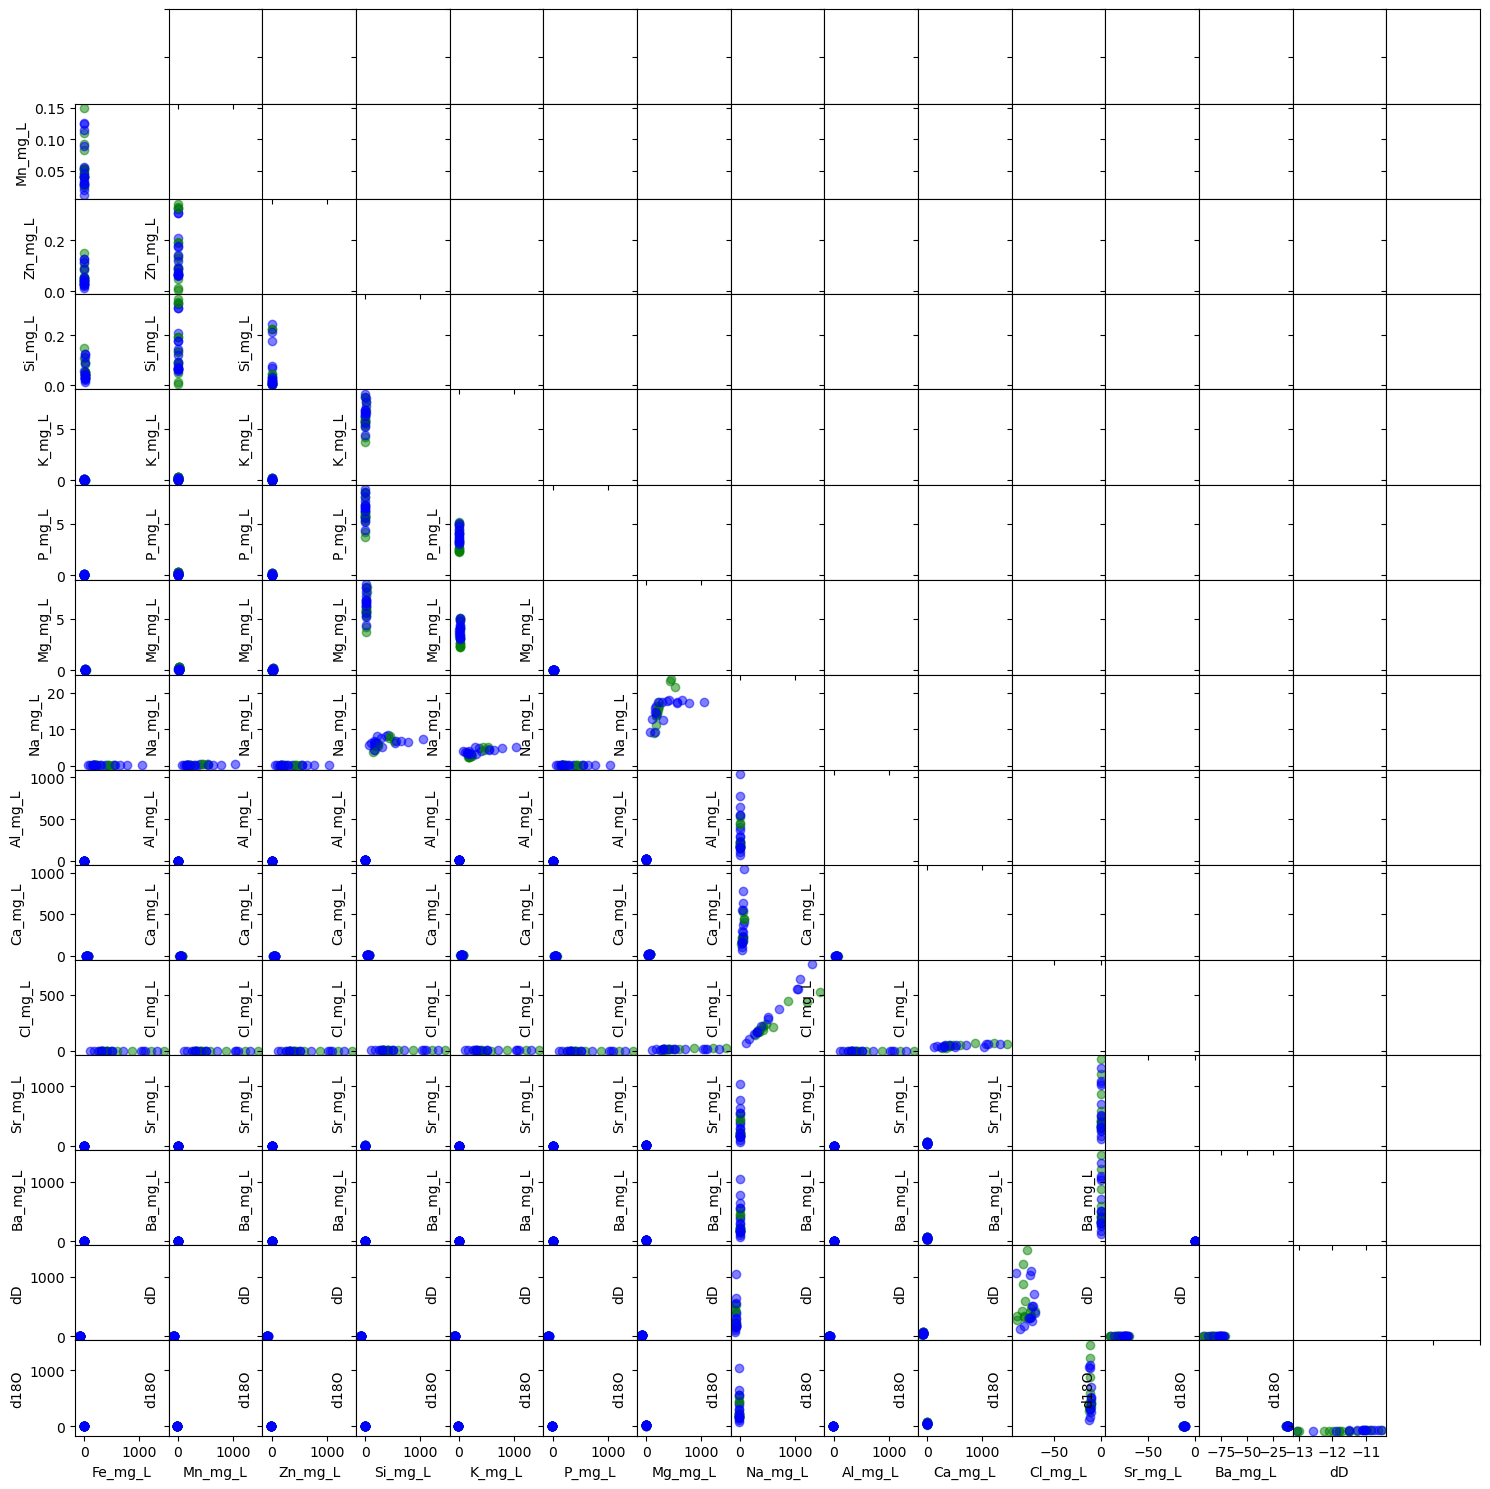

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Load the data from the CSV file
data = pd.read_csv("RI25-IC-ICP-isotope-joined.csv")

# Filter the data to include only the rows where 'Site' is "Hungerford" and 'Type' is grab or ISCO (not EMs)
data = data.loc[
    (data['Site'] == "Potash") & 
    (data['Type'].isin(['Grab', 'Grab/Isco', 'Isco', 'Baseflow']))
]

# List of solute column names
# No Cu, like there was in RI23 and RI24, but add Sr and Ba
solutes = ['Fe_mg_L', 'Mn_mg_L', 'Zn_mg_L', 'Si_mg_L', 'K_mg_L', 
           'P_mg_L', 'Mg_mg_L', 'Na_mg_L', 'Al_mg_L', 'Ca_mg_L', 
           'Cl_mg_L', 'Sr_mg_L', 'Ba_mg_L',
           'dD', 'd18O']

# Map months to seasons
season_colors = {
    1: "b",  # Blue for winter
    2: "b",
    3: "g",  # Green for spring
    4: "g",
    5: "g",
    6: "r",  # Red for summer
    7: "r",
    8: "r",
    9: "#8B4513",  # Brown for fall
    10: "#8B4513",
    11: "b",  # Blue for winter
    12: "b"
}

# Convert the "Date" column to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y", errors="coerce")

# Extract month from the "Date" column
data["Month"] = data["Date"].dt.month

# Map months to seasons
season_colors = {
    1: "b",  # Blue for winter
    2: "b",
    3: "g",  # Green for spring
    4: "g",
    5: "g",
    6: "r",  # Red for summer
    7: "r",
    8: "r",
    9: "#8B4513",  # Brown for fall
    10: "#8B4513",
    11: "b",  # Blue for winter
    12: "b"
}


# Create bivariate plots for all combinations of solutes
combinations_list = list(combinations(solutes, 2))

# Set up subplots in a lower triangular grid
num_params = len(solutes)
fig, axes = plt.subplots(num_params, num_params, figsize=(15, 15), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})

# Plot each bivariate combination in the lower triangular grid
for i, solute1 in enumerate(solutes):
    for j, solute2 in enumerate(solutes):
        if i >= j:  # Only create plots for the lower triangular part
            ax = axes[i, j]

            if i == j:
                ax.axis('off')  # Turn off axes for diagonal plots
            else:
                # Use a scatter plot with colored markers based on the season
                for season, color in season_colors.items():
                    season_data = data[data["Month"].between(season, season, inclusive="both")]
                    ax.scatter(
                        season_data[solute1], season_data[solute2],
                        alpha=0.5, label=f"Season {season}", c=color
                    )

                # Set labels and title
                ax.set_xlabel(solute2)
                ax.set_ylabel(solute1)
        else:
            # Set face color to white for the axes where there are no plots
            ax.axis('off')
            ax.set_facecolor('white')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

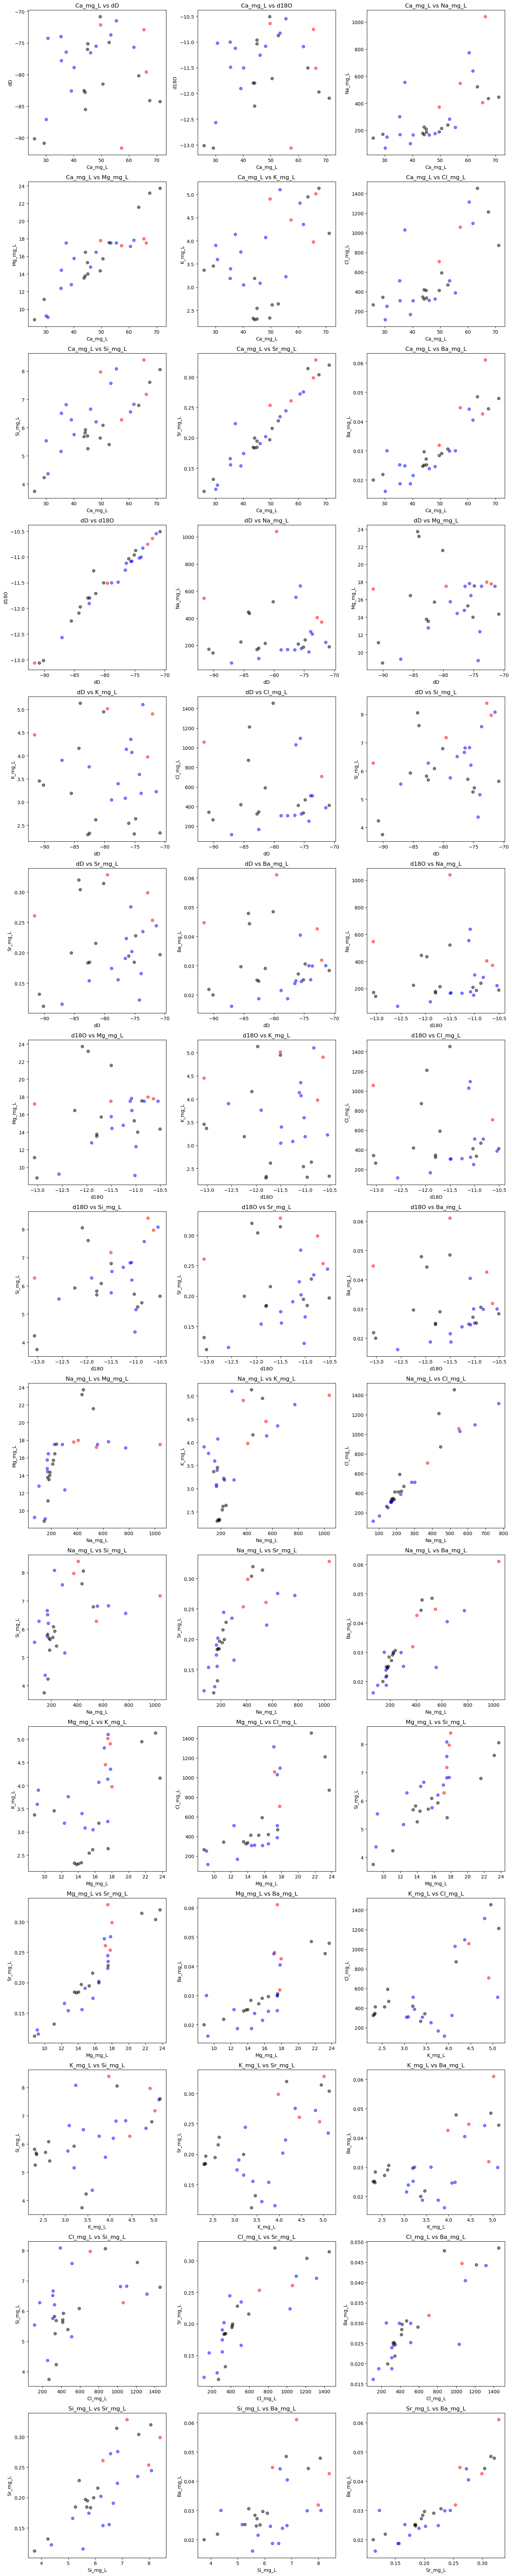

In [18]:
# same but not in a triangle
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Load the data from the CSV file
data = pd.read_csv("RI25-IC-ICP-isotope-joined.csv")

data = data.loc[
    (data['Site'] == "Potash") & 
    (data['Type'].isin(['Grab', 'Grab/Isco', 'Isco', 'Baseflow']))
]

# Select the specific parameters of interest
selected_parameters = ['Ca_mg_L', 'dD', 'd18O', 'Na_mg_L', 'Mg_mg_L', 'K_mg_L', 'Cl_mg_L', "Si_mg_L", 'Sr_mg_L', 'Ba_mg_L']

# Convert the "Date" column to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y", errors="coerce")

# Extract month from the "Date" column
data["Month"] = data["Date"].dt.month

# Define date ranges and corresponding colors
date_ranges = {
    "Dec-Jan": ("2024-12-01", "2025-01-31", "b"),  # Blue
    "Feb": ("2025-02-01", "2025-02-28", "r"),  # Red
    "Mar": ("2025-03-01", "2025-03-31", "k"),  # Black
    "Apr": ("2025-04-01", "2025-04-30", "g")   # Green
}

# Create bivariate plots for all combinations of selected parameters
combinations_list = list(combinations(selected_parameters, 2))

# Set up subplots
num_plots = len(combinations_list)
num_cols = 3  # You can adjust the number of columns in each row
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Plot each bivariate combination
for i, (solute1, solute2) in enumerate(combinations_list):
    ax = axes[i]
    
    # Use a scatter plot with colored markers based on the date ranges
    for label, (start_date, end_date, color) in date_ranges.items():
        event_data = data[data["Date"].between(start_date, end_date, inclusive="both")]
        ax.scatter(
            event_data[solute1], event_data[solute2],
            alpha=0.5, label=label, c=color
            #alpha=0.5, label=f"{label}: {start_date} - {end_date}", c=color
        )
        
    ax.set_xlabel(solute1)
    ax.set_ylabel(solute2)
    ax.set_title(f"{solute1} vs {solute2}")
    #ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

✅ Covariance matrix saved to: /home/millieginty/OneDrive/git-repos/EMMA/output/correlation-matrices/RI25-Potash-tracer_correlation_matrix.csv


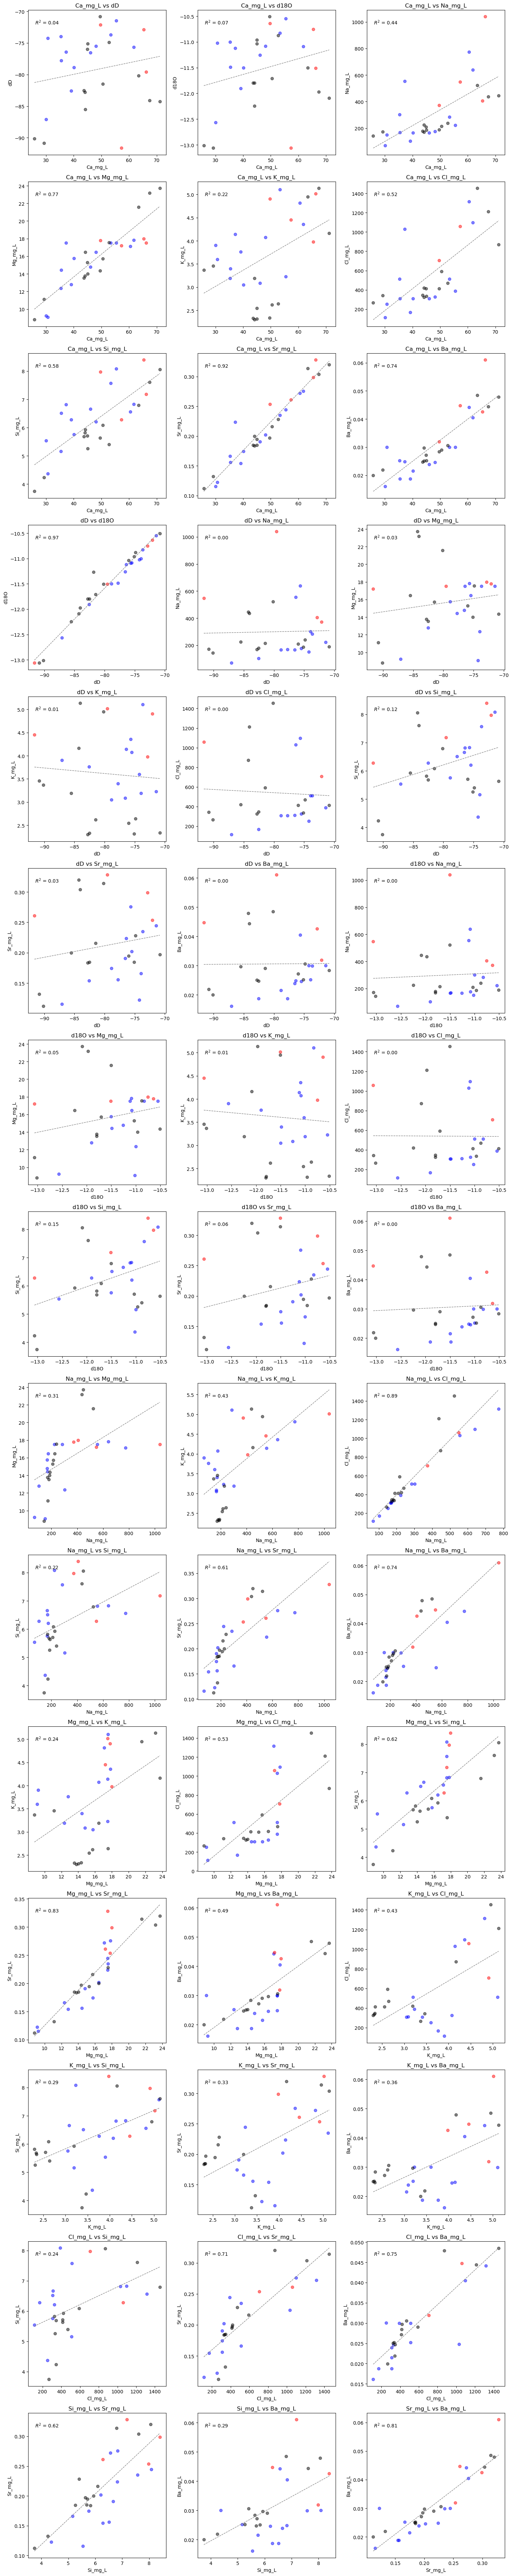

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import linregress
from pathlib import Path

#################################
# 1. Define input/output paths  #
#################################
input_file = "RI25-IC-ICP-isotope-joined.csv"
output_dir = Path("/home/millieginty/OneDrive/git-repos/EMMA/output/correlation-matrices/")

#################################
# 2. Load and filter the dataset #
#################################
data = pd.read_csv(input_file)

data = data.loc[
    (data['Site'] == "Potash") &
    (data['Type'].isin(['Grab', 'Grab/Isco', 'Isco', 'Baseflow']))
]

# Select parameters of interest
selected_parameters = [
    'Ca_mg_L', 'dD', 'd18O', 'Na_mg_L', 'Mg_mg_L', 'K_mg_L',
    'Cl_mg_L', 'Si_mg_L', 'Sr_mg_L', 'Ba_mg_L'
]

# Convert and extract month
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%Y", errors="coerce")
data["Month"] = data["Date"].dt.month

#################################
# 3. Compute and save correlation matrix #
#################################
# Subset and drop NaNs
tracer_data = data[selected_parameters].dropna()

# Compute correlation matrix
cov_matrix = tracer_data.corr()

# Save to CSV
cov_output_path = output_dir / "RI25-Potash-tracer_correlation_matrix.csv"
cov_matrix.to_csv(cov_output_path, float_format="%.4f")

print(f"✅ Covariance matrix saved to: {cov_output_path}")

#################################
# 4. Plot bivariate combinations #
#################################
# Define date ranges and colors
date_ranges = {
    "Dec-Jan": ("2024-12-01", "2025-01-31", "b"),
    "Feb": ("2025-02-01", "2025-02-28", "r"),
    "Mar": ("2025-03-01", "2025-03-31", "k"),
    "Apr": ("2025-04-01", "2025-04-30", "g")
}

# Generate combinations
combinations_list = list(combinations(selected_parameters, 2))

# Set up subplots
num_plots = len(combinations_list)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Loop through tracer pairs
for i, (solute1, solute2) in enumerate(combinations_list):
    ax = axes[i]

    # Scatter plots by event/date range
    for label, (start_date, end_date, color) in date_ranges.items():
        event_data = data[data["Date"].between(start_date, end_date, inclusive="both")]
        ax.scatter(event_data[solute1], event_data[solute2],
                   alpha=0.5, label=label, c=color)

    # Compute overall linear regression and R²
    df_pair = data[[solute1, solute2]].dropna()
    if not df_pair.empty:
        slope, intercept, r_value, p_value, std_err = linregress(df_pair[solute1], df_pair[solute2])
        r2 = r_value ** 2

        # Add regression line
        x_vals = pd.Series(sorted(df_pair[solute1]))
        y_vals = intercept + slope * x_vals
        ax.plot(x_vals, y_vals, color="gray", linestyle="--", linewidth=1)

        # Annotate R²
        ax.text(0.05, 0.9, f"$R^2$ = {r2:.2f}", transform=ax.transAxes,
                fontsize=10, color="black")

    ax.set_xlabel(solute1)
    ax.set_ylabel(solute2)
    ax.set_title(f"{solute1} vs {solute2}")

plt.tight_layout()
plt.show()


/tmp/ipykernel_406026/2775186972.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streamwater_data["Date"] = pd.to_datetime(streamwater_data["Date"], format="%m/%d/%Y", errors="coerce")
/tmp/ipykernel_406026/2775186972.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endmember_data["Date"] = pd.to_datetime(endmember_data["Date"], format="%m/%d/%Y")
/tmp/ipykernel_406026/2775186972.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring th

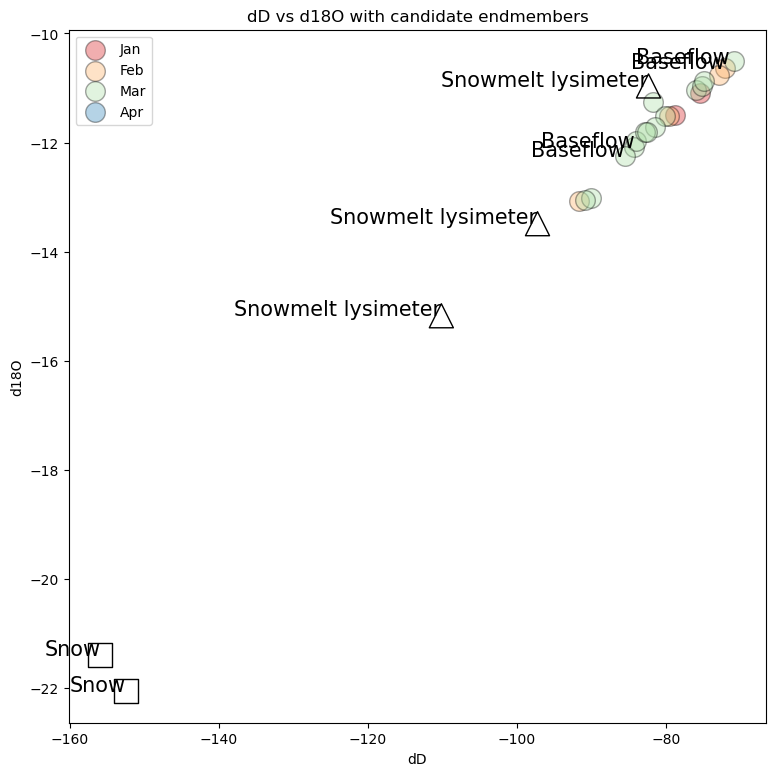

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("RI25-IC-ICP-isotope-joined.csv")

# Filter for 'Hungerford' sites and specific sample types
streamwater_data = data.loc[
    (data['Site'] == "Potash") & 
    (data['Type'].isin(['Grab', 'Grab/Isco', 'Isco', 'Baseflow']))
]

# Convert the "Date" column to datetime
streamwater_data["Date"] = pd.to_datetime(streamwater_data["Date"], format="%m/%d/%Y", errors="coerce")

# Load the potential endmembers from the separate CSV file
endmember_data = data.loc[
    (data['Site'] == "Potash") & 
    (data['Type'].isin(['Snow', 'Rain', 'Baseflow', 'Groundwater', \
                        'Soil water lysimeter', 'Snowmelt lysimeter',\
                       'Precip']))
]

# Convert the "Date" column to datetime in the endmember data
endmember_data["Date"] = pd.to_datetime(endmember_data["Date"], format="%m/%d/%Y")

# Define date ranges and corresponding colors for streamwater data
streamwater_date_ranges = {
    "Jan": ("2025-01-01", "2025-01-31", "#d7191c"),  # Blue
    "Feb": ("2025-02-01", "2025-02-28", "#fdae61"),  # Red
    "Mar": ("2025-03-01", "2025-03-31", "#abdda4"),  # Black
    "Apr": ("2025-04-01", "2025-04-30", "#2b83ba")   # Green
}

# Define markers for endmember types
endmember_markers = {'Rain': 'o', 'Snow': 's', 'Snowmelt lysimeter': '^', 'Precip': '*',\
                     'Soil water lysimeter': '<', 'Groundwater': 'D', 'Baseflow': '+'}

# Create a scatter plot for 'dD' vs 'd18O' with streamwater data
plt.figure(figsize=(9, 9))

# Create a scatter plot for 'dD' vs 'd18O' with streamwater data
legend_labels = []  # List to store legend labels for streamwater samples
for label, (start_date, end_date, color) in streamwater_date_ranges.items():
    event_data = streamwater_data[streamwater_data["Date"].between(start_date, end_date, inclusive="both")]
    plt.scatter(event_data['dD'], event_data['d18O'], label=label, alpha=0.35, edgecolor='black', c=color, s=200)
    
    legend_labels.append(label)

# Create a scatter plot for 'dD' vs 'd18O' with endmember data
for index, row in endmember_data.iterrows():
    plt.scatter(row['dD'], row['d18O'], label=row['Type'], marker=endmember_markers[row['Type']],
                color='none', edgecolor='black', s=300)
    plt.text(row['dD'], row['d18O'], row['Type'], fontsize=15, ha='right')

plt.xlabel('dD')
plt.ylabel('d18O')
plt.title('dD vs d18O with candidate endmembers')
plt.legend(legend_labels)
plt.show()